In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from a URL
url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
df = pd.read_csv(url)

In [2]:
# --- Dataset Summary ---

# Display the first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())
print("\n" + "="*50 + "\n")

# Get a concise summary of the dataframe
print("Dataset Info:")
df.info()
print("\n" + "="*50 + "\n")


# Get descriptive statistics for numerical columns
print("Descriptive Statistics:")
print(df.describe())
print("\n" + "="*50 + "\n")

# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

First 5 rows of the dataset:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Descriptive Statistics:
               age       

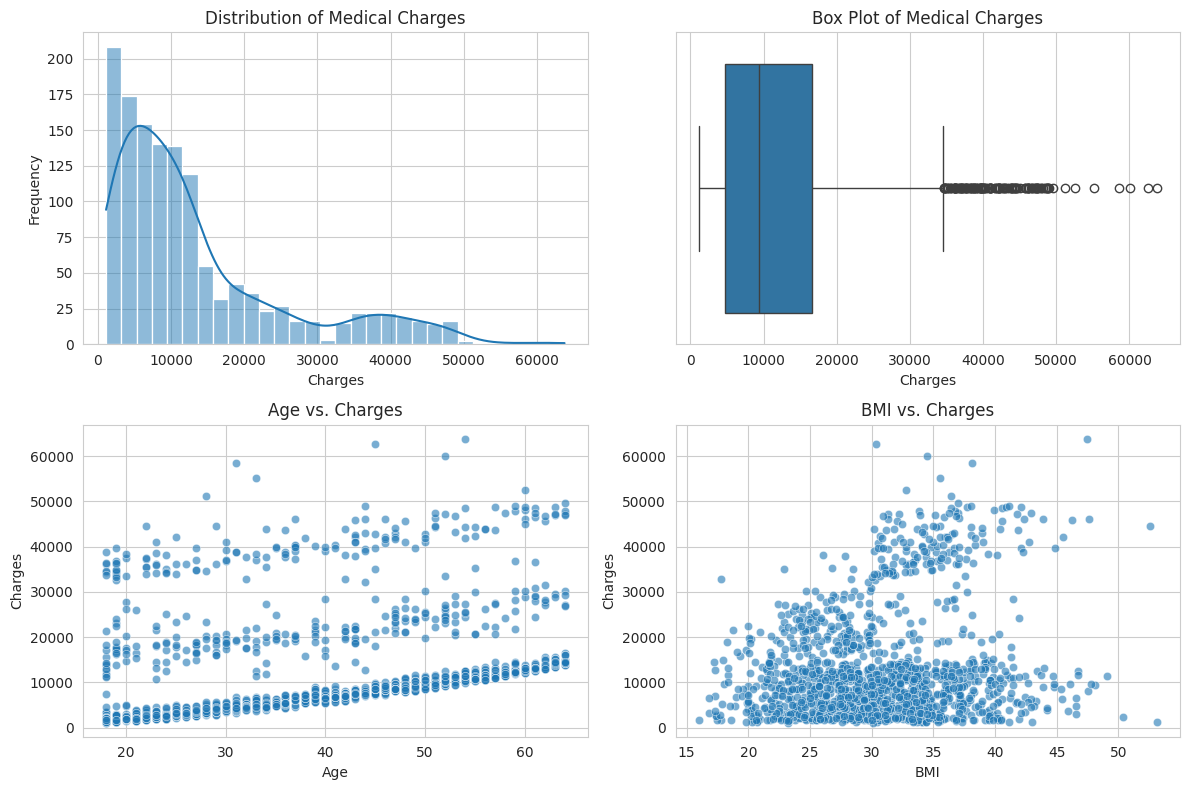

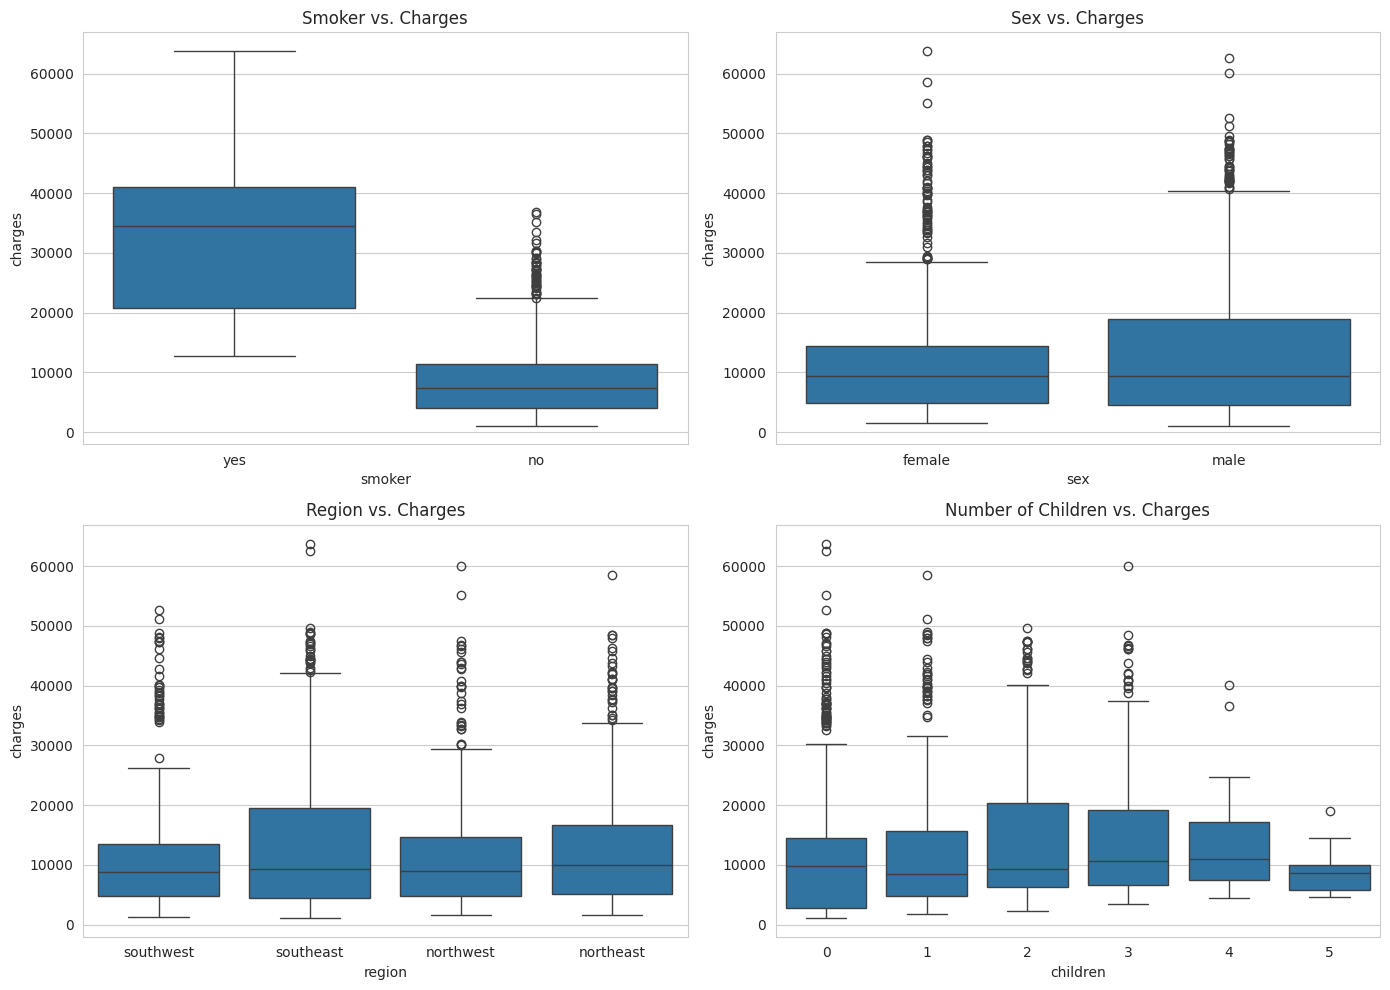

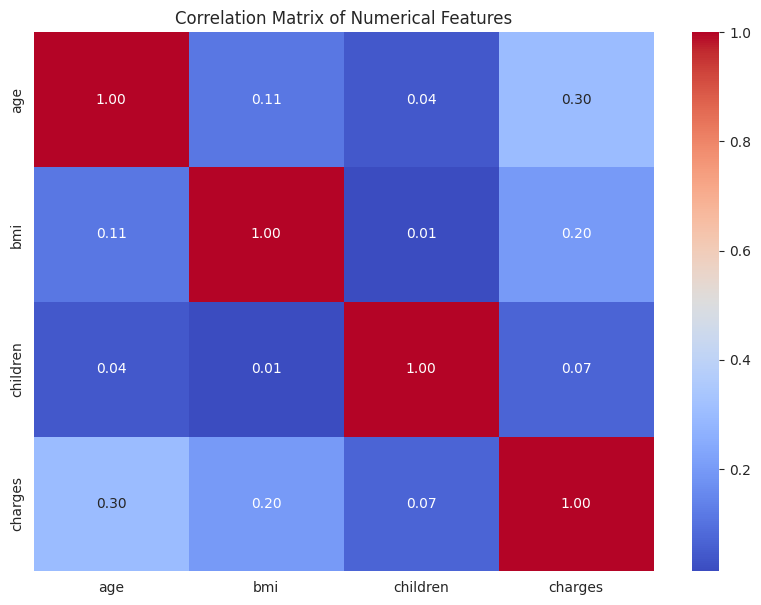

In [3]:
# Set the style for the plots
sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))

# --- 1. Analyze the Target Variable (charges) ---
plt.subplot(2, 2, 1)
sns.histplot(df['charges'], kde=True, bins=30)
plt.title('Distribution of Medical Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
sns.boxplot(x=df['charges'])
plt.title('Box Plot of Medical Charges')
plt.xlabel('Charges')


# --- 2. Explore Relationships with Numerical Features ---
plt.subplot(2, 2, 3)
sns.scatterplot(x='age', y='charges', data=df, alpha=0.6)
plt.title('Age vs. Charges')
plt.xlabel('Age')
plt.ylabel('Charges')

plt.subplot(2, 2, 4)
sns.scatterplot(x='bmi', y='charges', data=df, alpha=0.6)
plt.title('BMI vs. Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')

plt.tight_layout()
plt.show()


# --- 3. Explore Relationships with Categorical Features ---
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Smoker vs. Charges')

plt.subplot(2, 2, 2)
sns.boxplot(x='sex', y='charges', data=df)
plt.title('Sex vs. Charges')

plt.subplot(2, 2, 3)
sns.boxplot(x='region', y='charges', data=df)
plt.title('Region vs. Charges')

plt.subplot(2, 2, 4)
sns.boxplot(x='children', y='charges', data=df)
plt.title('Number of Children vs. Charges')

plt.tight_layout()
plt.show()

# --- 4. Correlation Analysis ---
# Select only numeric columns for correlation
numeric_cols = df.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [4]:
# --- Feature Engineering: One-Hot Encoding ---

# Use pandas get_dummies to one-hot encode the categorical features
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Display the first 5 rows of the new encoded dataframe
print("Encoded DataFrame head:")
print(df_encoded.head())

# The 'drop_first=True' argument is used to avoid multicollinearity,
# which is important for some machine learning models.
# For example, 'sex_male' is created, and if its value is 0, it implies the sex is female.

Encoded DataFrame head:
   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400     False        True             False   
1   18  33.770         1   1725.55230      True       False             False   
2   28  33.000         3   4449.46200      True       False             False   
3   33  22.705         0  21984.47061      True       False              True   
4   32  28.880         0   3866.85520      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


In [5]:
# Import the stats module from the scipy library
from scipy import stats

# --- Hypothesis Test 1: Smokers vs. Non-Smokers ---

# 1. Separate the data into two groups: smokers and non-smokers
smokers_charges = df[df['smoker'] == 'yes']['charges']
nonsmokers_charges = df[df['smoker'] == 'no']['charges']

# 2. Check for homogeneity of variances using Levene's test
# H0: The variances are equal.
# H1: The variances are not equal.
levene_test = stats.levene(smokers_charges, nonsmokers_charges)
print(f"Levene's Test Statistic: {levene_test.statistic}, p-value: {levene_test.pvalue}")

# Interpret Levene's test
if levene_test.pvalue < 0.05:
    print("Levene's test is significant. The variances are not equal.")
    equal_var_flag = False
else:
    print("Levene's test is not significant. The variances are equal.")
    equal_var_flag = True

print("\n" + "="*50 + "\n")

# 3. Perform the Independent Samples t-test
# We will use Welch's t-test if variances are unequal
t_statistic, p_value_twotail = stats.ttest_ind(smokers_charges, nonsmokers_charges, equal_var=equal_var_flag)

# Our alternative hypothesis is one-sided (smokers > non-smokers),
# so we divide the two-tailed p-value by 2.
p_value_onetail = p_value_twotail / 2

# We also need to ensure the t-statistic is positive, which means the mean of the first group (smokers) is larger than the second.
print(f"T-statistic: {t_statistic}")
print(f"One-tailed p-value: {p_value_onetail}")
print("\n" + "="*50 + "\n")


# 4. Interpret the results
alpha = 0.05
if p_value_onetail < alpha and t_statistic > 0:
    print(f"Conclusion: Since the p-value ({p_value_onetail:.2e}) is less than alpha ({alpha}), we reject the null hypothesis.")
    print("There is strong evidence that the average medical charges for smokers are significantly higher than for non-smokers.")
else:
    print(f"Conclusion: Since the p-value ({p_value_onetail:.2e}) is greater than alpha ({alpha}), we fail to reject the null hypothesis.")
    print("There is not enough evidence to support that the average charges for smokers are higher than for non-smokers.")

# Print the means for context
print("\n--- Average Charges ---")
print(f"Average charges for smokers: ${smokers_charges.mean():.2f}")
print(f"Average charges for non-smokers: ${nonsmokers_charges.mean():.2f}")

Levene's Test Statistic: 332.6135162726081, p-value: 1.5593284881803726e-66
Levene's test is significant. The variances are not equal.


T-statistic: 32.751887766341824
One-tailed p-value: 2.94473222335849e-103


Conclusion: Since the p-value (2.94e-103) is less than alpha (0.05), we reject the null hypothesis.
There is strong evidence that the average medical charges for smokers are significantly higher than for non-smokers.

--- Average Charges ---
Average charges for smokers: $32050.23
Average charges for non-smokers: $8434.27


**Key Takeaways**


This project analyzed a dataset of medical insurance costs to identify key factors influencing charges. The analysis revealed several critical insights:

Smoking status is the single most powerful predictor of medical charges. The difference is not just marginal but substantial, with smokers costing insurance providers nearly four times as much as non-smokers on average.

Age and BMI also show a positive correlation with medical charges, meaning older and heavier individuals tend to have higher costs.

Factors like gender, region, and the number of children do not appear to be primary drivers of medical expenses.

**Next Steps**


Based on these findings, the following next steps are recommended:

Build a Predictive Model: The cleaned and feature-engineered data is ready for machine learning. A regression model (such as Linear Regression, Gradient Boosting, or a Neural Network) could be trained to predict medical charges for new individuals. This model would be highly valuable for insurance companies for premium calculation and risk assessment.

Explore Interaction Effects: Further analysis should be done to formally model the interaction effects observed during EDA, particularly the one between high BMI and smoking. Understanding these combined effects could lead to more accurate predictive models.

Targeted Health & Wellness Programs: The findings provide a strong business case for insurance companies to invest in smoking cessation programs. By helping clients quit smoking, they can significantly reduce claims costs, creating a win-win scenario.
